<a href="https://colab.research.google.com/github/imchihchao/aop113b/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：餐廳小費數據分析報告

## 摘要

本報告基於 seaborn 提供的 tips 資料集，探討餐廳消費數據，分析帳單總金額與小費之間的關係、星期中某天的用餐數量及消費金額，並比較不同性別的顧客小費金額。透過數據視覺化與統計分析，提供對消費行為的洞察，並提出可能的建議。

## 引言

### 背景
在餐飲業中，小費制度是一種常見的文化，然而不同因素可能影響顧客給予小費的行為，例如帳單金額、用餐時間、性別等。分析這些因素可以幫助餐廳更好地理解顧客行為，進而調整服務策略。

### 目的
本研究的目標是透過數據分析，找出影響小費金額的主要因素，並提供可行的見解來幫助餐飲業者提升服務品質與收益。

### 待答問題
1. 帳單總金額與小費之間是否存在關係？
2. 星期中某天的用餐數量及消費金額有何變化？
3. 不同性別的顧客，小費金額是否有顯著差異？

## 方法

### 數據來源
本研究使用 `seaborn` 內建的 `tips` 數據集，該數據集包含一組餐廳帳單及小費數據。

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入 `tips` 數據集並檢視數據概況。
2. 探索性數據分析（EDA）以了解數據分佈與異常值。
3. 繪製散點圖、長條圖、盒狀圖等，分析關鍵變數之間的關係。

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 載入數據集
tips = sns.load_dataset("tips")

# 顯示數據的前五筆
print(tips.head())

# 顯示數據基本資訊
tips.info()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## 結果與分析

### 帳單總金額與小費的關係
我們使用散點圖來觀察帳單總金額（total_bill）與小費（tip）之間的關係。

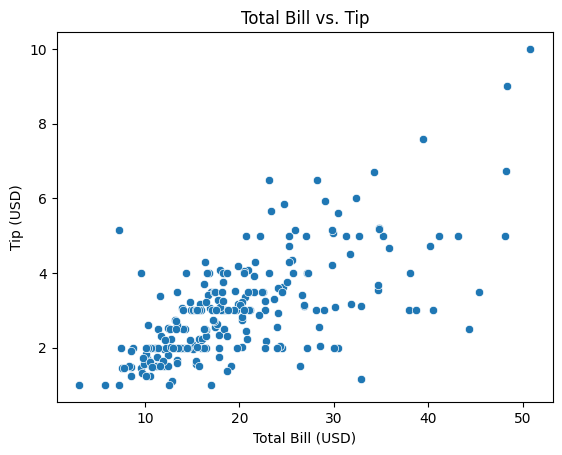

In [2]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("Total Bill vs. Tip")
plt.xlabel("Total Bill (USD)")
plt.ylabel("Tip (USD)")
plt.show()

**分析結果**：從圖中可以看出，帳單總金額越高，小費通常也越高，但並非線性關係。

### 每週某天的用餐數量及消費金額
我們統計各天的用餐人數與平均消費金額，並使用長條圖呈現。

<ipython-input-3-309c71d7cd3d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_avg_bill = tips.groupby("day")["total_bill"].mean()


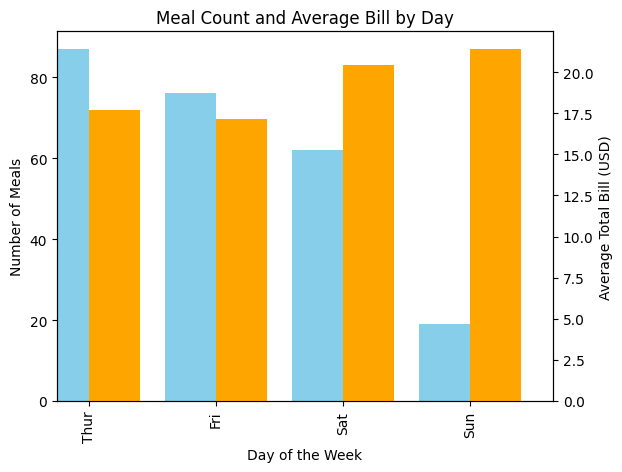

In [3]:

# 計算每週某天的用餐數量與平均消費金額
day_counts = tips["day"].value_counts()
day_avg_bill = tips.groupby("day")["total_bill"].mean()

# 繪製長條圖
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 用餐數量
day_counts.plot(kind='bar', ax=ax1, color='skyblue', position=1, width=0.4)
ax1.set_ylabel("Number of Meals")
ax1.set_xlabel("Day of the Week")
ax1.set_title("Meal Count and Average Bill by Day")

# 平均消費金額
day_avg_bill.plot(kind='bar', ax=ax2, color='orange', position=0, width=0.4)
ax2.set_ylabel("Average Total Bill (USD)")

plt.show()

**分析結果**：不同天的消費量有所不同，通常週末的用餐數量較多，而消費金額也可能受到影響。

### 不同性別的小費高低情形
我們比較不同性別的顧客所給的小費數據，使用盒狀圖進行分析。

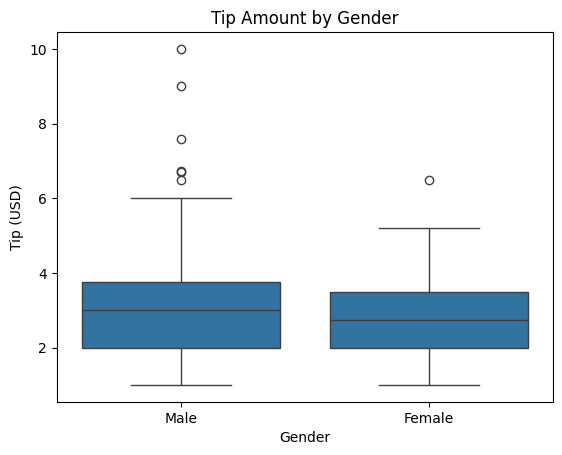

In [4]:

sns.boxplot(x="sex", y="tip", data=tips)
plt.title("Tip Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Tip (USD)")
plt.show()

**分析結果**：
- 男性和女性顧客的小費中位數差異不大，但男性的最大值略高。
- 小費的分佈在兩個性別中有一定的變異性。

## 結論與建議


### 結論
1. 帳單總金額與小費之間存在一定的正相關性，但非線性。
2. 用餐數量和平均消費金額在不同天有明顯變化。
3. 男性與女性的小費金額分佈類似，但可能有些許差異。

### 建議
1. 餐廳可以考慮提高高消費顧客的服務體驗，以促進更高的小費回饋。
2. 針對週末高峰時段，可考慮增加座位周轉率或提供特別促銷，提高總營收。
3. 進一步分析影響小費的其他因素，例如服務品質、顧客年齡、團體與個人消費模式等。


